In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# initialize lists 
links_pic = []
titles = []
prices = []
ratings = []
availabilitys = []
tds = []

In [ ]:
# creat requests on the website of books
Url = requests.get(f"https://books.toscrape.com/") 
soupe = BeautifulSoup(Url.text,'lxml')

In [ ]:
# get de nombre of pages per html tag 
nbrpages = int(soupe.find(class_ = "current").text.strip().split()[3])

## browse all the pages and retrieve the information of each book in each page

In [ ]:
# get all page of website
for i in range(1, a+1):
    Url = requests.get(f"https://books.toscrape.com/catalogue/page-{i}.html") 
    soup = BeautifulSoup(Url.text, 'lxml')
    tds = soup.findAll('article')
    for td in tds:
    # get product title     
        titles.append(td.find("img").get("alt"))
    # get product price
        prices.append(td.find("p", class_ = "price_color").text[2:]) 
    # get availablity of products
        availabilitys.append(td.find("p", class_ = "instock availability").get("class")[0])
    # get links of picture  
        links_pic.append("https://books.toscrape.com/" + td.find("img").get("src"))
    # get ratings
        ratings.append(td.find("p", class_ = "star-rating").get("class")[1])

In [ ]:
# creat dict with all variables
scraped = {'title': titles, 'price': prices, 'availability': availabilitys, "link": links_pic, "rating": ratings}

In [ ]:
df = pd.DataFrame(scraped)

In [ ]:
# transform ratings to numeric form 
df["rating"] = df["rating"].str.replace("One", "1")
df["rating"] = df["rating"].str.replace("Two", "2")
df["rating"] = df["rating"].str.replace("Three", "3")
df["rating"] = df["rating"].str.replace("Four", "4")
df["rating"] = df["rating"].str.replace("Five", "5")
df["rating"] = df["rating"].astype(int)

In [ ]:
# creat csv file 
df.to_csv('scraped.csv', header = True, index = False, index_label = None)

In [2]:
# i do read csv when i don't have network connexion 
df_analyse = pd.read_csv(r'books_scraped.csv', encoding = "UTF8")

In [4]:
# get only numeric values for plot
df_boxplot = df_analyse[['price','rating']]
df_boxplot

,price,rating
0,51.77,3
1,53.74,1
2,50.10,1
3,47.82,4
4,54.23,5
...,...,...
995,55.53,1
996,57.06,4
997,16.97,5
998,53.98,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

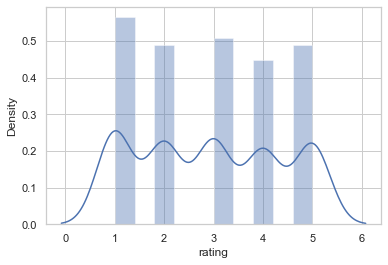

In [5]:
# visualisation of rating distribution 
sns.distplot(df_boxplot['rating'])

### we notice that there is a homogeneous distribution of rating 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

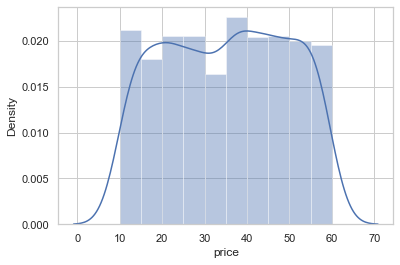

In [6]:
# visualisation of price distribution 
sns.distplot(df_boxplot['price'])

### we notice that there is a homogeneous distribution of price

<AxesSubplot:xlabel='rating', ylabel='price'>

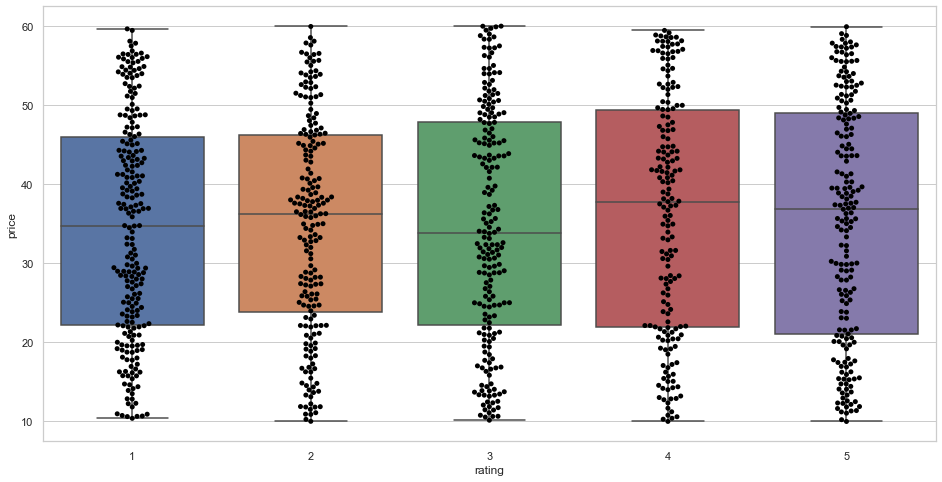

In [7]:
# visualisation distribution between rating and price 
plt.figure(figsize = (16, 8))
sns.boxplot(y = 'price', x = 'rating', data = df_boxplot)
sns.swarmplot(x = 'rating', y = 'price', data = df_boxplot, color = 'black')

### we notice that the average price per rating is very close, as are the standard deviations, we conclude that the prices and rating were chosen at random

In [8]:
# calculate the general price average and add mean columns 
moyen = df_analyse['price'].mean()
df_analyse["mean"] = moyen

In [9]:
# calculate the price average per cat of rating
liste_moyen = df_analyse.groupby('rating')['price'].mean().reset_index()
liste_moyen

,rating,price
0,1,34.561195
1,2,34.810918
2,3,34.692020
3,4,36.093296
4,5,35.374490


In [13]:
# recover the price average per cat of rating
mean1 = liste_moyen.price[0]
mean2 = liste_moyen.price[1]
mean3 = liste_moyen.price[2]
mean4 = liste_moyen.price[3]
mean5 = liste_moyen.price[4]

In [14]:
# create a column and put the appropriate values
df_analyse["price_mean"] = df_analyse.apply(lambda row : mean1 if row["rating"] == 1 else (mean2 if row["rating"] == 2 else (mean3 if row["rating"] == 3 else (mean4 if row["rating"] == 4 else mean5))), axis=1)
df_analyse

,title,price,availability,link,rating,mean,price_mean
0,A Light in the Attic,51.77,instock,https://books.toscrape.com/../media/cache/2c/d...,3,35.07035,34.692020
1,Tipping the Velvet,53.74,instock,https://books.toscrape.com/../media/cache/26/0...,1,35.07035,34.561195
2,Soumission,50.10,instock,https://books.toscrape.com/../media/cache/3e/e...,1,35.07035,34.561195
3,Sharp Objects,47.82,instock,https://books.toscrape.com/../media/cache/32/5...,4,35.07035,36.093296
4,Sapiens: A Brief History of Humankind,54.23,instock,https://books.toscrape.com/../media/cache/be/a...,5,35.07035,35.374490
...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,instock,https://books.toscrape.com/../media/cache/96/e...,1,35.07035,34.561195
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,instock,https://books.toscrape.com/../media/cache/09/7...,4,35.07035,36.093296
997,A Spy's Devotion (The Regency Spies of London #1),16.97,instock,https://books.toscrape.com/../media/cache/1b/5...,5,35.07035,35.374490
998,1st to Die (Women's Murder Club #1),53.98,instock,https://books.toscrape.com/../media/cache/2b/4...,1,35.07035,34.561195


In [15]:
# transform it to numpy 
Y1 = np.array(df_analyse['price'])
Y2 = np.array(df_analyse['mean'])
Y3 = np.array(df_analyse['price_mean'])

In [16]:
# calculate inter and intra deviation and report
intra = np.sum((Y1-Y3) ** 2) # Ar = np.square(np.subtract(Y1, Y3)).sum()
inter = np.sum((Y3-Y2) ** 2)
rapport = inter / (inter + intra)
rapport

0.001468958407307229

### coef of corr is realy small so there no corrélation between price and rating 